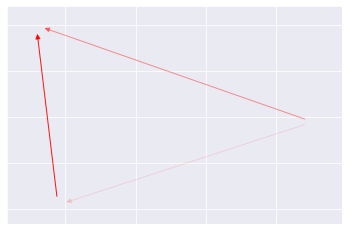

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])
arcs = nx.draw_networkx_edges(G, pos=nx.spring_layout(G), edge_color='red')
alphas = [0.1, 0.4, 0.9]
for i, arc in enumerate(arcs):  # change alpha values of arcs
    arc.set_alpha(alphas[i])

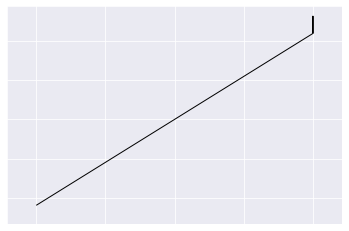

In [19]:
fig, ax = plt.subplots()
G = nx.Graph([(0, 1), (0, 0)])  # Self-loop at node 0
edge_collection = nx.draw_networkx_edges(G, pos=nx.circular_layout(G), ax=ax)
ax.patches[0]

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6} 
4 {4: 0, 3: 1, 5: 1, 0: 2, 1: 2, 2: 2, 6: 2, 7: 3, 8: 4, 9: 5} 
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4} 
6 {6: 0, 5: 1, 7: 1, 8: 2, 4: 2, 9: 3, 3: 3, 0: 4, 1: 4, 2: 4} 
7 {7: 0, 8: 1, 6: 1, 9: 2, 5: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5} 
8 {8: 0, 9: 1, 7: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6} 
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7} 

average shortest path length 2.86

length #paths
0 10
1 24
2 16
3 14
4 12
5 10
6 8
7 6
radius: 4
diameter: 7
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
center: [5, 6]
periphery: [0, 1, 2, 9]
density: 0.26666666666666666


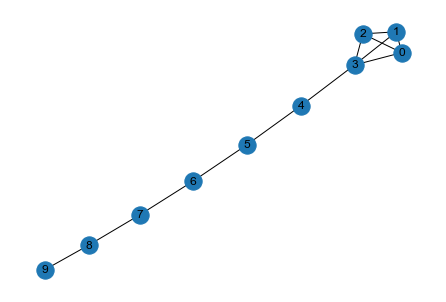

In [22]:
G = nx.lollipop_graph(4, 6)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=True)
plt.show()

(0, 0) (1, 0) (0, 1)
(0, 1) (1, 1) (0, 2)
(0, 2) (1, 2) (0, 3)
(0, 3) (1, 3) (0, 4)
(0, 4) (1, 4)
(1, 0) (2, 0) (1, 1)
(1, 1) (2, 1) (1, 2)
(1, 2) (2, 2) (1, 3)
(1, 3) (2, 3) (1, 4)
(1, 4) (2, 4)
(2, 0) (3, 0) (2, 1)
(2, 1) (3, 1) (2, 2)
(2, 2) (3, 2) (2, 3)
(2, 3) (3, 3) (2, 4)
(2, 4) (3, 4)
(3, 0) (4, 0) (3, 1)
(3, 1) (4, 1) (3, 2)
(3, 2) (4, 2) (3, 3)
(3, 3) (4, 3) (3, 4)
(3, 4) (4, 4)
(4, 0) (4, 1)
(4, 1) (4, 2)
(4, 2) (4, 3)
(4, 3) (4, 4)
(4, 4)


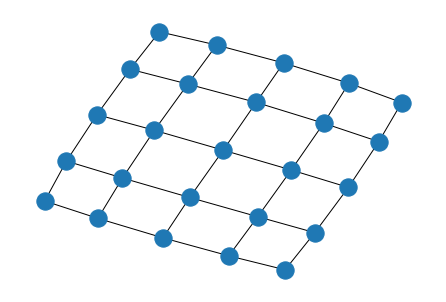

In [23]:
G = nx.grid_2d_graph(5, 5)  # 5x5 grid

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

pos = nx.spring_layout(H, seed=200)
nx.draw(H, pos)
plt.show()

In [1]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

NameError: name 'nx' is not defined

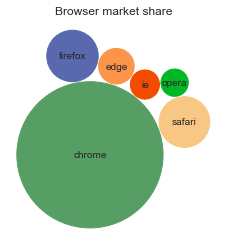

In [1]:
import numpy as np
import matplotlib.pyplot as plt

browser_market_share = {
    'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
    'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Browser market share')

plt.show()

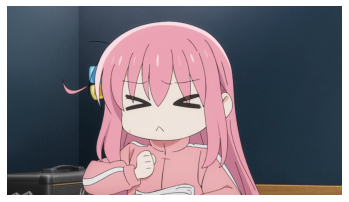

In [18]:
# draw cicrle in node networkx

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook


with cbook.get_sample_data('E:\\test-social-network\\pycon_social_networkx\\avatar\\324586711_1243374486251699_2022762596629668999_n.jpg') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((560, 600), radius=2100, transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
plt.show()

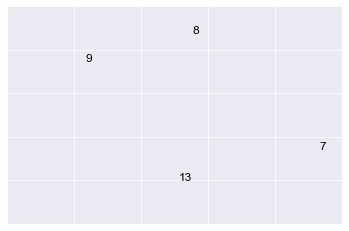

In [21]:
G = nx.dodecahedral_graph()
labels = nx.draw_networkx_labels(G, pos=nx.spring_layout(G))

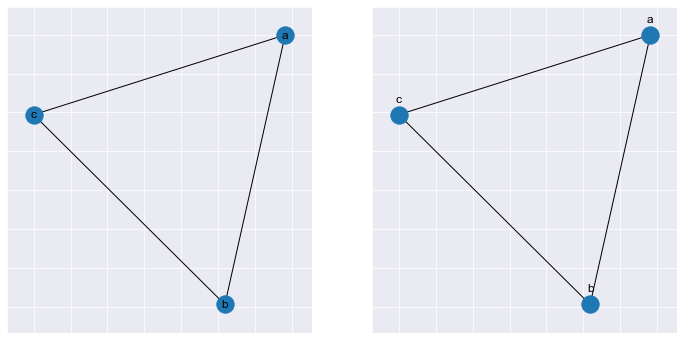

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

G = nx.Graph()
G.add_edge('a','b')
G.add_edge('b','c')
G.add_edge('a','c')

pos = nx.spring_layout(G)
pos_nodes = nudge(pos, 0, 0.1)                              # shift the layout

fig, ax = plt.subplots(1,2,figsize=(12,6))
nx.draw_networkx(G, pos=pos, ax=ax[0])                      # default labeling
nx.draw_networkx(G, pos=pos, with_labels=False, ax=ax[1])   # default nodes and edges
nx.draw_networkx_labels(G, pos=pos_nodes, ax=ax[1])         # nudged labels
# ax[1].set_ylim(tuple(i*1.1 for i in ax[1].get_ylim()))      # expand plot to fit labels
plt.show()

In [2]:
df1 = pd.DataFrame( {
    "Name" : ["Alice", "Bob", "Mallory", "Mallory", "Bob" , "Mallory"] ,
    "City" : ["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"] } )
print(df1)

      Name      City
0    Alice   Seattle
1      Bob   Seattle
2  Mallory  Portland
3  Mallory   Seattle
4      Bob   Seattle
5  Mallory  Portland


In [17]:
g1 = df1.groupby( [ "Name", "City"]).head(1)
print(g1)

      Name      City
0    Alice   Seattle
1      Bob   Seattle
2  Mallory  Portland
3  Mallory   Seattle


In [6]:
type(g1)

pandas.core.groupby.generic.DataFrameGroupBy

In [14]:
g2 = df1.groupby(["Name", "City"])[['Name','City']].count()
print(g2)

                  Name  City
Name    City                
Alice   Seattle      1     1
Bob     Seattle      2     2
Mallory Portland     2     2
        Seattle      1     1


[(0, 0), (1, 3), (2, 100), (3, 4)]


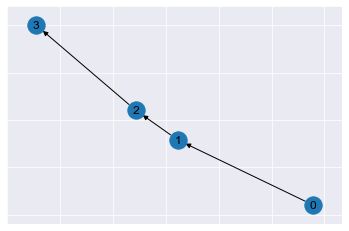

In [40]:
G = nx.DiGraph()
nx.add_path(G, [0, 1, 2, 3])  # or DiGraph, MultiGraph, MultiDiGraph, etc
G.degree[0]  # node 0 has degree 1
G[0][1]['weight'] = 3
G[1][2]['weight'] = 100
G[2][3]['weight'] = 4
nx.draw_networkx(G)
print(G.in_degree( weight='weight'))

In [ ]:
import file excel => dataRoot
filter những bài post có cùng người
if đăng

In [13]:
import pandas as pd

raw_data = {'name': ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel'],
'age': [20, 19, 22, 21],
'favorite_color': ['blue', 'blue', 'yellow', 'green'],
'grade': [88, 92, 95, 70]}
df = pd.DataFrame(raw_data)

# drop 1
a = df.drop(df[df['age']<20].index)
# print(a)
print(df)

# drop 2
a = df[df['age' > 20]]


a1 = df[df['age']> 20][['name', 'age']]
print(a1)

# group by

# select row

# select column

# select row and column


               name  age favorite_color  grade
0    Willard Morris   20           blue     88
1       Al Jennings   19           blue     92
2      Omar Mullins   22         yellow     95
3  Spencer McDaniel   21          green     70
               name  age
2      Omar Mullins   22
3  Spencer McDaniel   21


In [26]:
import networkx as nx

from bokeh.palettes import Category20_20
from bokeh.plotting import figure, from_networkx, show, output_file

G = nx.desargues_graph() # always 20 nodes

p = figure(x_range=(-2, 2), y_range=(-2, 2),
           x_axis_location=None, y_axis_location=None,
           tools="hover", tooltips="index: @index")
p.grid.grid_line_color = None

graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
p.renderers.append(graph)

# Add some new columns to the node renderer data source
graph.node_renderer.data_source.data['index'] = list(range(len(G)))
graph.node_renderer.data_source.data['colors'] = Category20_20

graph.node_renderer.glyph.update(size=20, fill_color="colors")
output_file("interactive_graphs.html")
show(p)

{(0, 1): 'navy', (0, 2): 'navy', (0, 3): 'navy', (0, 4): 'navy', (0, 5): 'navy', (0, 6): 'navy', (0, 7): 'navy', (0, 8): 'navy', (0, 10): 'navy', (0, 11): 'navy', (0, 12): 'navy', (0, 13): 'navy', (0, 17): 'navy', (0, 19): 'navy', (0, 21): 'navy', (0, 31): 'firebrick', (1, 2): 'navy', (1, 3): 'navy', (1, 7): 'navy', (1, 13): 'navy', (1, 17): 'navy', (1, 19): 'navy', (1, 21): 'navy', (1, 30): 'firebrick', (2, 3): 'navy', (2, 7): 'navy', (2, 8): 'navy', (2, 9): 'firebrick', (2, 13): 'navy', (2, 27): 'firebrick', (2, 28): 'firebrick', (2, 32): 'firebrick', (3, 7): 'navy', (3, 12): 'navy', (3, 13): 'navy', (4, 6): 'navy', (4, 10): 'navy', (5, 6): 'navy', (5, 10): 'navy', (5, 16): 'navy', (6, 16): 'navy', (8, 30): 'firebrick', (8, 32): 'firebrick', (8, 33): 'firebrick', (9, 33): 'navy', (13, 33): 'firebrick', (14, 32): 'navy', (14, 33): 'navy', (15, 32): 'navy', (15, 33): 'navy', (18, 32): 'navy', (18, 33): 'navy', (19, 33): 'firebrick', (20, 32): 'navy', (20, 33): 'navy', (22, 32): 'navy',

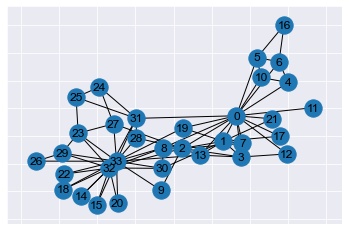

In [31]:
import networkx as nx

from bokeh.plotting import figure, show, from_networkx
from bokeh.models import BoxZoomTool, Circle, HoverTool, MultiLine, Plot, Range1d, PointDrawTool, ResetTool
from bokeh.palettes import  Spectral4

G = nx. karate_club_graph()
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "navy", "firebrick"
edge_attr = dict()

for start_node, end_node, _ in G.edges(data = True):
    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]['club'] == G.nodes[end_node]['club'] else DIFFERENT_CLUB_COLOR
    edge_attr[(start_node, end_node)] = edge_color

print(edge_attr)
nx.set_edge_attributes(G, edge_attr, "edge_color")

p = figure()

g = from_networkx(G, nx.spring_layout, scale=1, center=(0,0))

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("Club", "@club")])
p.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

draw_tool = PointDrawTool(renderers=[g.node_renderer], empty_value='black')
p.add_tools(draw_tool)
p.toolbar.active_tap = draw_tool
nx.draw_networkx(G)


g.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
g.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.7, line_width=1)
p.renderers.append(g)

show(p)

In [29]:
from bokeh.plotting import figure, output_file, show, Column
from bokeh.models import DataTable, TableColumn, PointDrawTool, ColumnDataSource

output_file("tools_point_draw.html")

p = figure(x_range=(0, 10), y_range=(0, 10), tools=[],
           title='Point Draw Tool')
p.background_fill_color = 'lightgrey'

source = ColumnDataSource({
    'x': [1, 5, 9], 'y': [1, 5, 9], 'color': ['red', 'green', 'yellow']
})

renderer = p.scatter(x='x', y='y', source=source, color='color', size=10)
columns = [TableColumn(field="x", title="x"),
           TableColumn(field="y", title="y"),
           TableColumn(field='color', title='color')]
table = DataTable(source=source, columns=columns, editable=True, height=200)

draw_tool = PointDrawTool(renderers=[renderer], empty_value='black')
p.add_tools(draw_tool)
p.toolbar.active_tap = draw_tool

show(Column(p, table))

In [2]:
import networkx as nx
from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,
                          ColumnDataSource, OpenURL, TapTool)
from bokeh.plotting import from_networkx, figure, output_file, show


# Prepare Data
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

# set urls as node attributes
urls = {
    1: "https://stackoverflow.com/questions/69456723/networkx-add-hyperlink-to-each-node",
    2: "https://facebook.com",
    3: "https://google.com",
    4: "Test",
    5: "Test"

}
nx.set_node_attributes(G, urls, "URL")

# Show with Bokeh
p = figure(plot_width=400, plot_height=400,
           x_range=Range1d(-2, 6), y_range=Range1d(-0.2, 0.5),
           tools="tap", title="Click the URL")

# Configure node hover tool and add tools
node_hover_tool = HoverTool(tooltips=[("URL", "@URL")])
p.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

# Configure tap tool
url = "@URL"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

graph_renderer = from_networkx(G, pos, scale=0.5, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color="white",
                                           line_color = "black", line_width = 1)
graph_renderer.edge_renderer.glyph = MultiLine(line_color="black", line_alpha=1,
                                               line_width=1)
p.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(p)

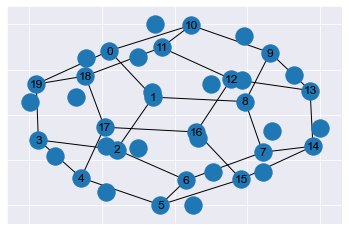

In [4]:
import networkx as nx
from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,
                          ColumnDataSource, OpenURL, TapTool, PointDrawTool)
from bokeh.plotting import from_networkx, figure, output_file, show
from bokeh.palettes import  Spectral4

G = nx.dodecahedral_graph()
nodes = nx.draw_networkx_nodes(G, pos=nx.spring_layout(G))


p = figure()

g = from_networkx(G, nx.spring_layout, scale=1, center=(0,0))

node_hover_tool = HoverTool(tooltips=[("index", "@index")])
p.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

draw_tool = PointDrawTool(renderers=[g.node_renderer], empty_value='black')
p.add_tools(draw_tool)
p.toolbar.active_tap = draw_tool
nx.draw_networkx(G)


g.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
g.edge_renderer.glyph = MultiLine(line_alpha=0.7, line_width=1)
p.renderers.append(g)

show(p)

In [10]:
list = [({1:'a', 1.1: 'a1', 1.2:'a2'}), ({2:'b'}), ({3:'c'}), ({4:'d'})]
print(list)
for a in list:
    print(a)
    for b in a:
        print('-----------------------')
        print(b)
        print(type(b))

[{1: 'a', 1.1: 'a1', 1.2: 'a2'}, {2: 'b'}, {3: 'c'}, {4: 'd'}]
{1: 'a', 1.1: 'a1', 1.2: 'a2'}
-----------------------
1
<class 'int'>
-----------------------
1.1
<class 'float'>
-----------------------
1.2
<class 'float'>
{2: 'b'}
-----------------------
2
<class 'int'>
{3: 'c'}
-----------------------
3
<class 'int'>
{4: 'd'}
-----------------------
4
<class 'int'>


In [17]:
def chunks(xs, n):
    n = max(1, n)
    print(1111)
    return (xs[i:i+n] for i in range(0, len(xs), n))
a = chunks(range(1,100), 10)
print(a)

1111


NameError: name 'xrange' is not defined

In [20]:
import math

from bokeh.io import output_file, show
from bokeh.models import Ellipse, GraphRenderer, StaticLayoutProvider
from bokeh.palettes import Spectral8
from bokeh.plotting import figure

N = 8
# node_indices = list(range(N))
node_indices = [1,2,3,4,5,6,7,8]


plot = figure(title="Graph Layout Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

graph = GraphRenderer()

graph.node_renderer.data_source.add(node_indices, 'index')
graph.node_renderer.data_source.add(Spectral8, 'color')
graph.node_renderer.glyph = Ellipse(height=0.1, width=0.2, fill_color="color")

graph.edge_renderer.data_source.data = dict(
    start=[0]*N,
    end=node_indices)

### start of layout code
circ = [i*2*math.pi/8 for i in node_indices]
x = [math.cos(i) for i in circ]
y = [math.sin(i) for i in circ]
graph_layout = dict(zip(node_indices, zip(x, y)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

### Draw quadratic bezier paths
def bezier(start, end, control, steps):
    return [(1-s)**2*start + 2*(1-s)*s*control + s**2*end for s in steps]

xs, ys = [], []
sx, sy = graph_layout[0]
steps = [i/100. for i in range(100)]
for node_index in node_indices:
    ex, ey = graph_layout[node_index]
    xs.append(bezier(sx, ex, 0, steps))
    ys.append(bezier(sy, ey, 0, steps))
graph.edge_renderer.data_source.data['xs'] = xs
graph.edge_renderer.data_source.data['ys'] = ys

plot.renderers.append(graph)

output_file("graph.html")
show(plot)

KeyError: 0

In [27]:
a = range(1, 1001)
print([*a])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [3]:
import numpy as np

from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
from bokeh.models.markers import Circle
from bokeh.io import curdoc, show

N = 9
x = np.linspace(-2, 2, N)
y = x**2
sizes = np.linspace(10, 20, N)

source = ColumnDataSource(dict(x=x, y=y, sizes=sizes))

plot = Plot(
    title=None, plot_width=300, plot_height=300,
    min_border=0, toolbar_location=None)

glyph = Circle(x="x", y="y", size="sizes", line_color="#3288bd", fill_color="white", line_width=3)
plot.add_glyph(source, glyph)

xaxis = LinearAxis()
plot.add_layout(xaxis, 'below')

yaxis = LinearAxis()
plot.add_layout(yaxis, 'left')

plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

curdoc().add_root(plot)

show(plot)

In [1]:
import networkx as nx
from bokeh.models import Range1d, MultiLine, Circle, TapTool, Plot, HoverTool, BoxSelectTool
from bokeh.plotting import figure
from bokeh.io import curdoc
from bokeh.layouts import row
from bokeh.models.widgets import Dropdown
from bokeh.events import Tap
from bokeh.plotting import from_networkx, figure, output_file, show


def choose_node_outline_colors(nodes_clicked):
    outline_colors = []
    for node in G.nodes():
        if str(node) in nodes_clicked:
            outline_colors.append('pink')
        else:
            outline_colors.append('black')
    return outline_colors


def update_node_highlight(event):
    nodes_clicked_ints = source.selected.indices
    nodes_clicked = list(map(str, nodes_clicked_ints))
    source.data['line_color'] = choose_node_outline_colors(nodes_clicked)


G = nx.karate_club_graph()

plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
graph = from_networkx(
    G,
    nx.circular_layout,
    scale=1,
    center=(0,0)
)

# Create nodes and edges
source = graph.node_renderer.data_source
source.data['line_color'] = choose_node_outline_colors('1')
graph.node_renderer.glyph = Circle(size=10, line_color="line_color")
graph.edge_renderer.glyph = MultiLine(line_alpha=1.6, line_width=0.5)

# Add tap tool
TOOLTIPS = [
    ("Index", "@index"),
]
plot.add_tools(HoverTool(tooltips=TOOLTIPS), TapTool(), BoxSelectTool())

plot.renderers.append(graph)

taptool = plot.select(type=TapTool)

plot.on_event(Tap, update_node_highlight)

curdoc().add_root(plot)
show(plot)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [13]:
from bokeh.models import ColumnDataSource, MultiSelect, Column
from bokeh.plotting import figure, curdoc, show
from datetime import datetime
from random import randint
from bokeh.palettes import Category10

lines = ['line_{}'.format(i) for i in range(10)]
data = [{'time':[], item:[]} for item in lines]
sources = [ColumnDataSource(item) for item in data]

plot = figure(plot_width = 1200, x_axis_type = 'datetime')

def add_line(attr, old, new):
    for line in new:
        if not plot.select_one({"name": line}):
            index = lines.index(line)
            plot.line(x = 'time', y = line, color = Category10[10][index], name = line, source = sources[index])

multiselect = MultiSelect(title = 'Options', options = [(i, i) for i in lines], value = [''])
multiselect.on_change('value', add_line)

def update():
    for line in lines:
        if line in multiselect.value:
            if plot.select({"name": line}):
                sources[lines.index(line)].stream(eval('dict(time = [datetime.now()], ' + line + ' = [randint(5, 10)])'))

curdoc().add_root(Column(plot, multiselect))
curdoc().add_periodic_callback(update, 1000)
# show()

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



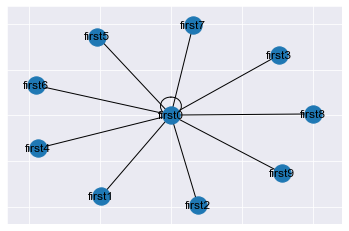

In [12]:
# -*- coding: utf-8 -*-

import networkx as nx

from bokeh.plotting import figure, from_networkx, curdoc, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,
                          ColumnDataSource, OpenURL, TapTool, PointDrawTool, Rect, TextInput)
from bokeh.layouts import column

global graph
G = nx.Graph()

field = TextInput(value="first", title="Graph to select: ")


def graphe(base, H):
    for i in range(0, 10):
        H.add_node(base + str(i), name=base + str(i),
                   version=str(i),
                   width=.2,
                   offset=- 25,
                   color=' red')
        H.add_edge(base + str(0), base + str(i))


def update(attr, old, new):
    newG = nx.Graph()
    graphe(new, newG)
    newplot = figure(title="RPM network", width=1500, height=800, x_range=(-2.1, 2.1), y_range=(-2.1, 2.1),
                     tools="", toolbar_location=None)
    newgraph = from_networkx(newG, nx.spring_layout, scale=4, center=(0, 0))
    newgraph.node_renderer.glyph = Rect(height=0.1, width="width", fill_color="color")
    newplot.add_tools(hover, BoxZoomTool(), ResetTool())
    newplot.renderers.append(newgraph)
    layout.children[1] = newplot


graphe("first", G)
nx.draw_networkx(G)
plot = figure(title="new RPM network", width=1500, height=800, x_range=(-2.1, 2.1), y_range=(-2.1, 2.1), toolbar_location=None)

hover = HoverTool()
hover.tooltips = """
<div style=padding=5px>@name</div>
<div style=padding=5px>@version</div>
"""
plot.add_tools(hover, BoxZoomTool(), ResetTool())
graph = from_networkx(G, nx.spring_layout, scale=1)
graph.node_renderer.glyph = Rect(height=0.1, width="width", fill_color="color")
plot.renderers.append(graph)
field.on_change('value', update)

layout = column(field, plot)
curdoc().add_root(layout)
show(layout)

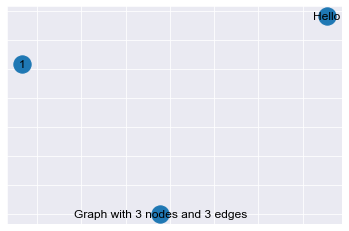

In [2]:

import networkx as nx

G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_node(1)
G.add_node("Hello")
K3 = nx.Graph([(0, 1), (1, 2), (2, 0)])
G.add_node(K3)
G.number_of_nodes()
nx.draw_networkx(G)

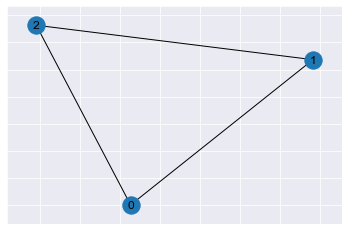

In [4]:
nx.draw_networkx(K3)

In [4]:
G = nx.path_graph(3)  # or DiGraph, MultiGraph, MultiDiGraph, etc
print(list(G.nodes))
G.remove_node(1)
list(G.nodes)

[0, 1, 2]


[0, 2]

In [1]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.models.graphs import from_networkx
import networkx as nx
output_notebook()

G = nx.karate_club_graph()

plot = figure(title="Karate Club Graph", tools="", x_range=(-1.5, 1.5),
          y_range=(-1.5, 1.5), toolbar_location=None)
graph = from_networkx(G, nx.spring_layout)
plot.renderers.append(graph)

x, y = zip(*graph.layout_provider.graph_layout.values())
node_labels = nx.get_node_attributes(G, 'club')
source = ColumnDataSource({'x': x, 'y': y,
                           'club': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='club', source=source,
                  background_fill_color='white')

plot.renderers.append(labels)
show(plot)

Loading BokehJS ...

In [3]:
print({'index': [i for i in range(25)]})

{'index': 24}


In [4]:
test = [1,2,3,4,6]

In [5]:
test[1]

2

In [ ]:
import numpy as np
import pandas as pd
from bokeh.io import curdoc
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.plotting import figure
from bokeh.models import Select, PreText
from bokeh.events import ButtonClick
from bokeh.models import ColumnDataSource, Slider, TextInput, Button
from bokeh.layouts import row, column, gridplot

from bokeh.core.properties import List, String, Dict, Int, Complex, Float

from bokeh.models import Button, LayoutDOM

IMPL = """
import * as p from "core/properties"
import {LayoutDOM, LayoutDOMView} from "models/layouts/layout_dom"

export class FileInputView extends LayoutDOMView
initialize: (options) ->
super(options)
input = document.createElement("input")
input.type = "file"
input.onchange = () =>
@model.value = input.value
@el.appendChild(input)

export class FileInput extends LayoutDOM
default_view: FileInputView
type: "FileInput"
@define {
value: [ p.String ]
}
"""


class FileInput(LayoutDOM):


    __implementation__ = IMPL
value = String()

.....

input = FileInput().

.....


def upload():
    print(input.value)
    df = pd.read_csv(input.value)


inputs = widgetbox(sensor_type, operation_type)
load_file = column([input, button])
curdoc().add_root(row(inputs, load_file, plot, width=800))